## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure that we get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read dataset
df = pd.read_csv('ab_data.csv')

# Store dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# we can use shape function and restrict to rows to see number of rows
row_num = df.shape[0]
print("The Number of rows in the cell are: {}".format(row_num))

The Number of rows in the cell are: 294478


c. The number of unique users in the dataset.

In [4]:
#We can use unique() function to achieve this
user_total = df.nunique()['user_id']
print("The number of unique users in the database are : {}".format(user_total))

The number of unique users in the database are : 290584


d. The proportion of users converted.

In [5]:
# we can get the proportion of users converted by taking the mean
print("The proportion of users converted are {}%".format((df['converted'].mean())*100))

The proportion of users converted are 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# rows where the treatment group and new page dont align
mismatch_grp1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("The treatment group land on the old_page the following number of times {}".format(len(mismatch_grp1)))

# rows where control group user incorrectly lands on new_page
mismatch_grp2 = df.query("group == 'control' and landing_page == 'new_page'")
print("The treatment group land on the new_page the following number of times {}".format(len(mismatch_grp2)))

#  number of times the new_page and treatment don't line up is sum of above two values
print("The new_page and treatment don't line up the following number of times {}".format(len(mismatch_grp1) + len(mismatch_grp2)))

The treatment group land on the old_page the following number of times 1965
The treatment group land on the new_page the following number of times 1928
The new_page and treatment don't line up the following number of times 3893


f. Do any of the rows have missing values?

In [7]:
#We can use the define Info function to see details of our table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


From the above, there are no null values as such no missing values within the rows

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Delete Rows
# Delete rows for mismatched treatment groups
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
# Delete rows for mismatched control groups
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
# Next, lets save new a new dataset which contains no duplicates or records with missing or mismatched values
# The new datset will be used in the next sections
df.to_csv('ab_edited.csv', index=False)

In [11]:
# Next read the newly newly created dataset into another dataframe so we can use for our analysis
df2 = pd.read_csv('ab_edited.csv')

In [12]:
# Double Check if any all incorrect rows were removed
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [13]:
# Get info for df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


a. How many unique **user_id**s are in **df2**?

In [14]:
# unique user ids count is
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
# check if duplicates in user_id
# we know that one user id is repeated due to difference between #userids and #unique ids
sum(df2['user_id'].duplicated())

1

In [16]:
# inspect duplicate userid
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [17]:
#investigate details of rows with duplicate user ids
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
# delete duplicate record 
# we choose one with timestamp as "2017-01-09 05:37:58.781806"
time_dup = "2017-01-14 02:55:59.590927"
df2 = df2[df2.timestamp != time_dup]

In [19]:
# inspect number of entries in df2 after deleting duplicate record
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [20]:
# as shown above, 290584 entries exist now having deleted index 2862
# we can confirm by checking unique values of user ids
len(df['user_id'].unique())

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
# since we have only two values which are 1 and 0, we can calculate mean tto get probability 
df['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
# First it is important to 'group' by column
# Then compute the statistics using the describe function
# as conversions are assigned boolean values, we can use mean to find probability of conversion

df_grp = df.groupby('group')
df_grp.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

Given that an individual was in the `control` group, the probability they would have been converted is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

Given the probability that the individual was in the `treatment` group, the probability they would have converted is 0.118807

d. What is the probability that an individual received the new page?

In [23]:
# The number of individuals who got new page is equal to those in the treatment group
new_user = len(df.query("group == 'treatment'"))

# Get total number of users with the shape function
users=df.shape[0]

# thus, probability that an individual received the new page is new_user/users
new_user_p = new_user/users
print(new_user_p)

0.5000636646764286


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Evidence that one page leads to more conversions?**

- The old page did a bit better than the new page
- The probability that an individual in the treatment group converted was 0.118807
- The probability that an individual in the control group converted was 0.120386

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis**
- $H_{0}$ : $p_{old}$  >=  $p_{new}$
- $H_{1}$ : $p_{old}$  <  $p_{new}$


###### In other words,
- $H_{0}$ : $p_{new}$ <= $p_{old}$  
- $H_{1}$ : $p_{new}$ > $p_{old}$ 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [26]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [27]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
# print(len(new_page_converted)) #code to check values

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
# print(len(old_page_converted))  #code to check values
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
# since new_page_converted and old_page_converted have different sizes, we cannot directly compute p_diff
# since, differernce is only 36 values of thousands, we truncate the excess in new_page_converted
new_page_converted = new_page_converted[:145274]

In [31]:
# print(p_diff) #code to check values
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [32]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

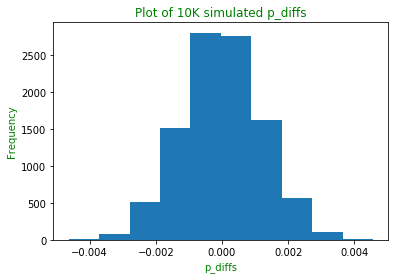

In [33]:
plt.hist(p_diffs)
plt.xlabel('p_diffs', color = 'green')
plt.ylabel('Frequency', color = 'green')
plt.title('Plot of 10K simulated p_diffs', color = 'green');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
# compute difference from original dataset ab_data.csv
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff 

-0.0015790565976871451

In [35]:
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00083064, -0.00091749,  0.00044514, ..., -0.00146102,
       -0.0008831 , -0.00028422])

In [36]:
# proportion of p_diffs greater than the actual difference observed in ab_data.csv is computed as:
(act_diff < p_diffs).mean()

0.9078

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

## **Answer:**
- We just computed p-values in j
- A P value allows us determine the correctedness of our hypotesis in statistics
- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.
- A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we can decide to reject the null hypothesis.
- A p-value very close to the cutoff (0.05) is considered to be marginal. 
- Since our p-value is above 0.5,we can see that is no conversion advantage with new pages. As such it is okay to conclude that old and new pages perform almost similarly. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

df2.head(5) 

/Users/babatunjiogunjobi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

#print(convert_old, convert_new, n_old, n_new)  #This code allows us test if values generated correctly

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [40]:
from scipy.stats import norm

print(norm.cdf(z_score))
#We can use the above to the get the z-score

#  to get the Z score, we assume a 95% confidence level, as such: 
print(norm.ppf(1-(0.05)))


0.9050583127590245
1.6448536269514722


**Answer:**
- The z-score of 1.31092419842 is less than the critical value of 1.64485362695. The null hypothesis is acceptable
- The Z score and p-value are similar and in agreement with the findings in parts j. and k. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [53]:
df2['intercept'] = 1
df2[['control','treatment']] = pd.get_dummies(df2['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
import statsmodels.api as sm

logit = sm.Logit(df2['converted'],df2[['intercept' ,'treatment']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
result=logit.fit()

result.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-31 14:48 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

**0.190**

> Part II is a one sided test that allows us compare two variables against each other while within this section we are using regression which allows us compare the effect of different dependent and independent variables on a static variable

- Our hypothesis here is:

$$ H_0: p_{new} = p_{old} $$
$$ H_1: p_{new} \neq p_{old} $$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
- We may take into consideration other factors to enable us know whether we would have had more conversions. Factors like location, Devices the page was being accessed from, customer archetypes could have been considered in our bid to  make a decision.

- Regression models are typically driven from the concept of inferential statistics.One important concept in inferential statistics is that the amount of information you can learn about a population is limited by the sample size. The more you want to learn, the larger your sample size must be.

However overfitting a regression model by adding more addittional terms does not neccessarily allow us get better results but rather makes the exercise a long drawn one. Increasing the sample size bsed on the limited terms would be a better approach 


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [44]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [46]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [47]:
# Create dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
### Fit Your Linear Model And Obtain the Results
df2['intercept'] = 1


log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: -0.221     
Date:               2018-05-31 14:48 AIC:              259887.4421
No. Observations:   290584           BIC:              259908.6014
Df Model:           1                Log-Likelihood:   -1.2994e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
CA       -2.0375     0.0260    -78.3639   0.0000   -2.0885   -1.9866
US       -1.9967     0.0068   -292.3145   0.0000   -2.0101   -1.9833
==================================================================

"""

In [50]:
np.exp(results.params)

CA    0.130350
US    0.135779
dtype: float64

In [51]:
1/_

0.00010001000100010001

In [52]:
df2.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

<a id='conclusions'></a>
## Conclusions

- The old page did infinitesimally better than the new page as such we can accept the Null Hypothesis and continue using the exisitng page
- The values above do not show a substantial difference in conversion rates for the control group and treatment group. This is noticeable based on the logistic regression done

## Resources
- http://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/
- http://blog.minitab.com/blog/adventures-in-statistics-2/the-danger-of-overfitting-regression-models
- https://youtu.be/7FTp9JJ5DfE 
- http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis#Hypothesis_Tests_in_Simple_Linear_Regression
- https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model
- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/


